## SQLAlchemy Homework - Surfs Up!

In [23]:
# Dependencies

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import pandas as pd

In [25]:
import datetime as dt

### Reflect Tables into SQLAlchemy ORM

In [26]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [27]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [28]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [29]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [30]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [31]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [32]:
#trip_start_date = '2017-08-08'
#trip_end_date = '2017-08-15'''

### Exploratory Climate Analysis

In [33]:
## Design a query to retrieve the last 12 months of precipitation data and plot the results ##
# Fetching most recent date
date_now = session.query(func.max(Measurement.date)).first()[0]

# Calculate the date 1 year ago from the last date in the database
year = int(date_now[0:4])
month = int(date_now[5:7])
day = int(date_now[8:])
one_year_ago_date = dt.date(year, month, day)- dt.timedelta(days=365)
#one_year_ago_date


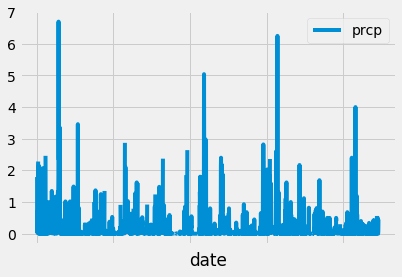

In [34]:
# Perform a query to retrieve the data and precipitation scores
last_12_months_prcp_record = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago_date).\
    filter(Measurement.date <= date_now).all()

last_12_months_prcp_record
   

# Save the query results into a Pandas DataFrame and set the index to the date column
prcp_list = []

for dt, prc in last_12_months_prcp_record:
    prcp_dict = {}
    prcp_dict["date"] = dt
    prcp_dict["prcp"] = prc
    prcp_list.append(prcp_dict)
    
prcp_df = pd.DataFrame(prcp_list)
prcp_df_indexed = prcp_df.set_index('date')

# Sort the dataframe by date
prcp_df_indexed = prcp_df_indexed.sort_values('date')
prcp_df_indexed.head()

# Plot the graph
chart = prcp_df_indexed.plot()


In [35]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df_indexed.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis

In [36]:
# Design a query to show how many stations are available in this dataset?

# first method
#stations_count = session.query(Station).count()
#stations_count

# Second method
stations_count = session.query(func.count(Station.station)).first()[0]
print(f"Number of stations are - {stations_count}")

Number of stations are - 9


In [37]:
## Design a query to find the most active stations.
# List the stations and observation counts in descending order.

active_stations = session.query(Station.station, func.count(Measurement.station)).\
    filter(Measurement.station == Station.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

for st, count in active_stations:
    print(f"Station: {st}.... Observation Count are- {count}")

Station: USC00519281.... Observation Count are- 2772
Station: USC00519397.... Observation Count are- 2724
Station: USC00513117.... Observation Count are- 2709
Station: USC00519523.... Observation Count are- 2669
Station: USC00516128.... Observation Count are- 2612
Station: USC00514830.... Observation Count are- 2202
Station: USC00511918.... Observation Count are- 1979
Station: USC00517948.... Observation Count are- 1372
Station: USC00518838.... Observation Count are- 511


In [38]:
# Station with hightest observations
station_high_obsv = active_stations[0][0]
print(f"Station with highest number of observations - {station_high_obsv}")

Station with highest number of observations - USC00519281


In [39]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of most active station?

lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == station_high_obsv).first()[0]
print(f"lowest temperature recorded - {lowest_temp}")

highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == station_high_obsv).first()[0]
print(f"highest temperature recorded - {highest_temp}")

avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == station_high_obsv).first()[0]
print(f"average temperature recorded - {round(avg_temp,2)}")


lowest temperature recorded - 54.0
highest temperature recorded - 85.0
average temperature recorded - 71.66


In [40]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Perform a query to retrieve the temperature records of last 12 months of station with hightest observations
last_12_months_temp_record = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= one_year_ago_date).\
    filter(Measurement.date <= date_now).\
    filter(Measurement.station == station_high_obsv).all()

# Save the query results into a Pandas DataFrame 
temp_list = []

for dt, temp in last_12_months_temp_record:
    #print(dt, prc)
    temp_dict = {}
    temp_dict["date"] = dt
    temp_dict["temp"] = temp
    temp_list.append(temp_dict)
    
temp_df = pd.DataFrame(temp_list)


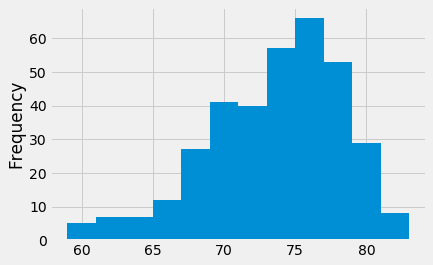

In [42]:
# Plot the histogram
x = temp_df['temp']
plt.hist(x, bins=12)
plt.ylabel('Frequency')
plt.show()

### Optional Challenge Assignment

In [43]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [44]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.



In [45]:
# Plot the results from your previous query as a bar chart. 

# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [46]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [47]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [48]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [49]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [50]:
# Plot the daily normals as an area plot with `stacked=False`
